<a href="https://colab.research.google.com/github/ssravali/Research-1/blob/master/CNN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Libraries initiated
import numpy as np
import pickle
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import logging
from time import time
import pandas as pd
from keras.layers import Flatten
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.layers import Conv1D, Dropout
from keras.layers import MaxPooling1D
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import scipy.io as sio
import keras
import random
print("Imported libraries")

Using TensorFlow backend.


Imported libraries


In [0]:
mat_contents = sio.loadmat('augtestx2.mat')
test_x = np.array(mat_contents['test_x'])

mat_contents = sio.loadmat('augtesty2.mat')
test_y = np.array(mat_contents['test_y'])

mat_contents = sio.loadmat('augtrainx2.mat')
train_x = np.array(mat_contents['train_x'])

mat_contents = sio.loadmat('augtrainy2.mat')
train_y = np.array(mat_contents['train_y'])

classes = np.unique(train_y)
nClasses = len(classes)

x_val = []
y_val = []

for i in classes:
    #print("i is: ",i)
    j = 0
    k = 1
    l = 2
    m = 3
    n = 4
    o = 5
    
    r, r1 = np.where(test_y == i)
    while(o < r.shape[0]):
        y_val.append(test_y[r[j]])
        y_val.append(test_y[r[k]])
        y_val.append(test_y[r[l]])
        y_val.append(test_y[r[m]])
        y_val.append(test_y[r[n]])
        y_val.append(test_y[r[o]])
        x_val.append(test_x[r[j]])
        x_val.append(test_x[r[k]])
        x_val.append(test_x[r[l]])
        x_val.append(test_x[r[m]])
        x_val.append(test_x[r[n]])
        x_val.append(test_x[r[o]])
        
        j = j + 12
        k = k + 12
        l = l + 12
        m = m + 12
        n = n + 12
        o = o + 12

val_x = np.array(x_val)
val_y = np.array(y_val)

enc = OneHotEncoder(sparse=False,categories='auto')
train_y = enc.fit_transform(train_y)
test_y = enc.fit_transform(test_y)
val_y = enc.fit_transform(val_y)

print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)
print("Val_y one hot:", val_y.shape)


#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")

Train_y one hot: (960, 10)
Test_y one hot: (240, 10)
Val_y one hot: (120, 10)
(960, 800, 10)
(240, 800, 10)
(120, 800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


Train on 960 samples, validate on 120 samples
Epoch 1/1000
 - 3s - loss: 2.4098 - acc: 0.1271 - mean_absolute_error: 0.1789 - val_loss: 2.3600 - val_acc: 0.1417 - val_mean_absolute_error: 0.1792
Epoch 2/1000
 - 2s - loss: 2.1931 - acc: 0.1906 - mean_absolute_error: 0.1758 - val_loss: 2.4727 - val_acc: 0.1583 - val_mean_absolute_error: 0.1778
Epoch 3/1000
 - 2s - loss: 2.0554 - acc: 0.2740 - mean_absolute_error: 0.1715 - val_loss: 2.4997 - val_acc: 0.1833 - val_mean_absolute_error: 0.1759
Epoch 4/1000
 - 2s - loss: 1.9159 - acc: 0.3521 - mean_absolute_error: 0.1655 - val_loss: 2.7228 - val_acc: 0.1750 - val_mean_absolute_error: 0.1742
Epoch 5/1000
 - 2s - loss: 1.6484 - acc: 0.4865 - mean_absolute_error: 0.1534 - val_loss: 2.6482 - val_acc: 0.2000 - val_mean_absolute_error: 0.1709
Epoch 6/1000
 - 2s - loss: 1.4054 - acc: 0.5781 - mean_absolute_error: 0.1406 - val_loss: 2.5512 - val_acc: 0.3250 - val_mean_absolute_error: 0.1641
Epoch 7/1000
 - 2s - loss: 1.1152 - acc: 0.6854 - mean_absol

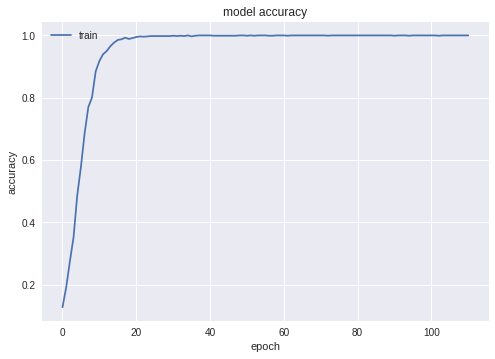

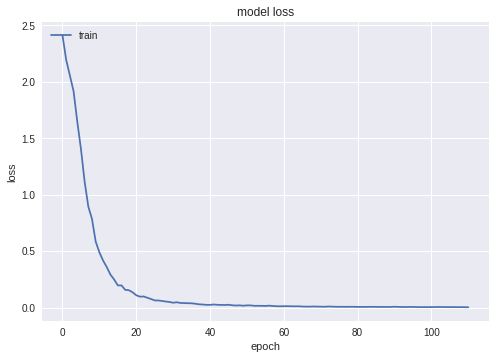

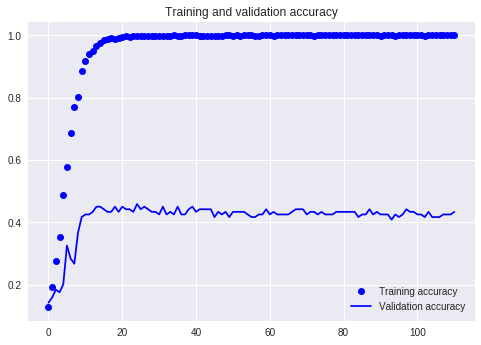

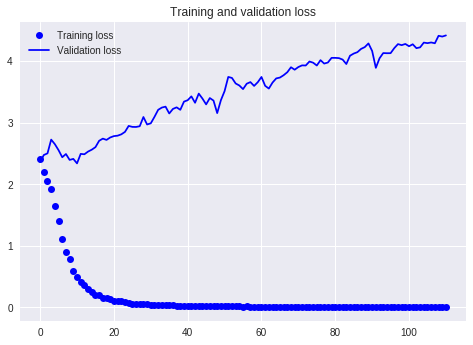

240/240 [==============================] - 0s 912us/step
Test loss: 2.3682317972183227
Test accuracy: 0.4166666666666667
(240, 10)
[[19  0  1  0  0  0  3  0  0  1]
 [12  9  0  1  0  1  0  0  0  1]
 [12  0 11  1  0  0  0  0  0  0]
 [13  0  0 10  0  0  0  0  0  1]
 [12  1  0  0 11  0  0  0  0  0]
 [12  0  0  0  0 11  1  0  0  0]
 [14  0  0  0  0  0  8  0  0  2]
 [12  0  1  0  2  0  0  5  0  4]
 [12  0  3  0  0  0  3  0  6  0]
 [13  1  0  0  0  0  0  0  0 10]]
              precision    recall  f1-score   support

           0       0.15      0.79      0.25        24
           1       0.82      0.38      0.51        24
           2       0.69      0.46      0.55        24
           3       0.83      0.42      0.56        24
           4       0.85      0.46      0.59        24
           5       0.92      0.46      0.61        24
           6       0.53      0.33      0.41        24
           7       1.00      0.21      0.34        24
           8       1.00      0.25      0.40        

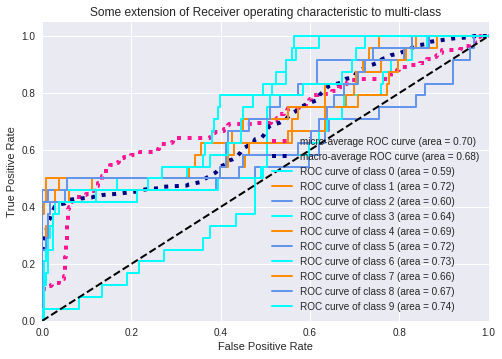

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(80, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='sigmoid', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(5)))


model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.adam(lr=0.001),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=50,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = enc.inverse_transform(pred_y)
ytest = enc.inverse_transform(test_y)
cm = confusion_matrix(ytest, predy)
print(cm)
print(classification_report(ytest, predy))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("The accuracy per activity is : ",cm.diagonal())

print(ytest.shape)
print(predy.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2

y_score = pred_y
y_test = test_y
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nClasses):
    #x = np.where(y_test == i)[0]
    
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nClasses)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(nClasses):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= nClasses

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(nClasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [0]:
mat_contents = sio.loadmat('augtestx2.mat')
testx = np.array(mat_contents['test_x'])
#print(testx.shape)
test_x = testx[0:120]
#val_x = np.concatenate(( testx[0:60],testx[120:180]),axis = 0)
#print(val_x.shape)
#print("loaded testx")

mat_contents = sio.loadmat('augtesty2.mat')
testy = np.array(mat_contents['test_y'])
test_y = testy[0:120]
#print("Loaded testy")
#print(test_y)
#val_y = np.concatenate(( testy[0:60],testy[120:180]),axis = 0)
#a_train, val_x1, b_train, val_y1 = train_test_split(test_x, test_y, test_size=0.5)

mat_contents = sio.loadmat('augtrainx2.mat')
train_x = np.array(mat_contents['train_x'])
#print("loadded trainx")

mat_contents = sio.loadmat('augtrainy2.mat')
trainy = np.array(mat_contents['train_y'])
#print("loaded trainy")
#a_train, val_x2, b_train, val_y2 = train_test_split(train_x, trainy, test_size=0.3)
#val_x = np.concatenate((val_x1,val_x2), axis = 0)
#print(val_y1.shape)
#print(val_y2.shape)
classes = np.unique(trainy)
nClasses = len(classes)

val_x1 = []
val_x2 = []
val_y1 = []
val_y2 = []

for i in range(nClasses):
    #print("Class: ", i)
    j = 2
    r,r1 = np.where(trainy == i)
    while(j <= (r.shape[0]/2)):
        val_x2.append(train_x[r[j]])
        val_y2.append(trainy[r[j]])
        j = j + 3
    r,r1 = np.where(test_y == i)
    j = 2
    k = 5
    R = []
    while(k <= r.shape[0]):
        val_x1.append(test_x[r[j]])
        val_y1.append(test_y[r[j]])
        R.append(r[k])
        j = j + 6
        k = k + 6
    #print(len(R))
    train_x = np.concatenate((train_x, test_x[R]),axis= 0)
    trainy = np.concatenate((trainy,testy[R]), axis = 0)

val_x1 = np.array(val_x1)
val_x2 = np.array(val_x2)
val_y1 = np.array(val_y1, dtype = int)
val_y2 = np.array(val_y2, dtype = int)
val_x = np.concatenate((val_x1,val_x2), axis = 0)
val_y = np.concatenate((val_y1,val_y2), axis = 0)

enc = OneHotEncoder(sparse=False,categories='auto')
train_y = enc.fit_transform(trainy)
test_y = enc.fit_transform(test_y)
val_y = enc.fit_transform(val_y)

print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)
print("Val_y one hot:", val_y.shape)


#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")


Train_y one hot: (980, 10)
Test_y one hot: (120, 10)
Val_y one hot: (180, 10)
(980, 800, 10)
(120, 800, 10)
(180, 800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


Train on 980 samples, validate on 180 samples
Epoch 1/1000
 - 3s - loss: 2.4697 - acc: 0.1194 - mean_absolute_error: 0.1794 - val_loss: 2.2638 - val_acc: 0.1944 - val_mean_absolute_error: 0.1787
Epoch 2/1000
 - 2s - loss: 2.2864 - acc: 0.1378 - mean_absolute_error: 0.1786 - val_loss: 2.2067 - val_acc: 0.2778 - val_mean_absolute_error: 0.1778
Epoch 3/1000
 - 2s - loss: 2.1955 - acc: 0.1969 - mean_absolute_error: 0.1764 - val_loss: 2.1202 - val_acc: 0.3444 - val_mean_absolute_error: 0.1753
Epoch 4/1000
 - 2s - loss: 2.1006 - acc: 0.2398 - mean_absolute_error: 0.1737 - val_loss: 2.0021 - val_acc: 0.4389 - val_mean_absolute_error: 0.1719
Epoch 5/1000
 - 2s - loss: 1.9961 - acc: 0.2684 - mean_absolute_error: 0.1698 - val_loss: 1.8716 - val_acc: 0.3833 - val_mean_absolute_error: 0.1661
Epoch 6/1000
 - 2s - loss: 1.8209 - acc: 0.3847 - mean_absolute_error: 0.1633 - val_loss: 1.7068 - val_acc: 0.5444 - val_mean_absolute_error: 0.1601
Epoch 7/1000
 - 2s - loss: 1.6888 - acc: 0.4408 - mean_absol

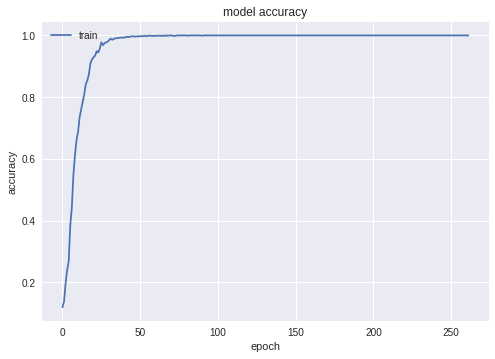

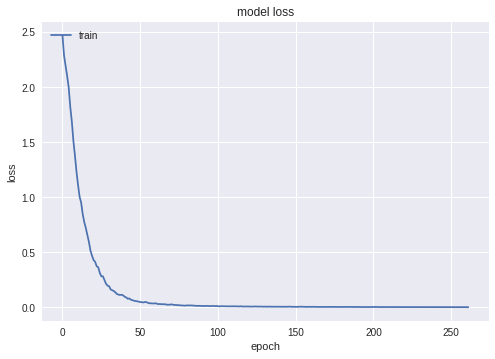

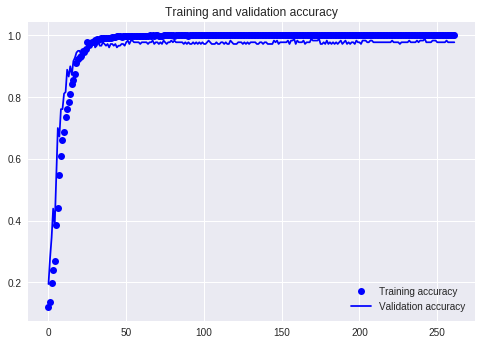

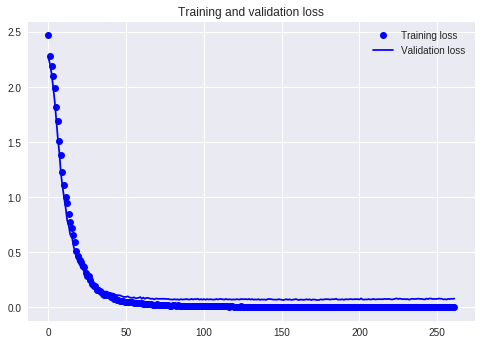

120/120 [==============================] - 0s 988us/step
Test loss: 0.5502813736597697
Test accuracy: 0.8166666626930237
(120, 10)
[[ 7  0  1  0  0  0  4  0  0  0]
 [ 0  7  0  0  0  5  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 2  0  0  8  0  0  0  0  0  2]
 [ 0  0  0  0 12  0  0  0  0  0]
 [ 0  2  0  0  0 10  0  0  0  0]
 [ 4  0  0  0  0  0  7  0  0  1]
 [ 0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0 12  0]
 [ 1  0  0  0  0  0  0  0  0 11]]
              precision    recall  f1-score   support

           0       0.50      0.58      0.54        12
           1       0.78      0.58      0.67        12
           2       0.92      1.00      0.96        12
           3       1.00      0.67      0.80        12
           4       1.00      1.00      1.00        12
           5       0.67      0.83      0.74        12
           6       0.64      0.58      0.61        12
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        

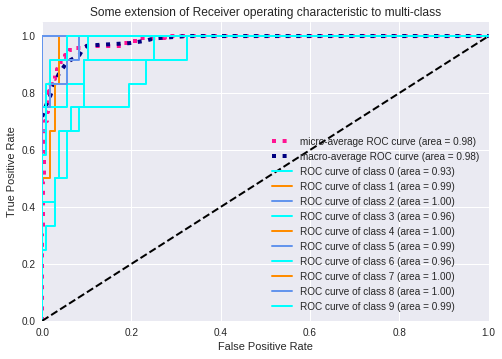

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(80, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='sigmoid', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(5)))


model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.adam(lr=0.001),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = enc.inverse_transform(pred_y)
ytest = enc.inverse_transform(test_y)
cm = confusion_matrix(ytest, predy)
print(cm)
print(classification_report(ytest, predy))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("The accuracy per activity is : ",cm.diagonal())

print(ytest.shape)
print(predy.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2

y_score = pred_y
y_test = test_y
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nClasses):
    #x = np.where(y_test == i)[0]
    
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nClasses)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(nClasses):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= nClasses

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(nClasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [0]:
mat_contents = sio.loadmat('augtestx2.mat')
test_x = np.array(mat_contents['test_x'])

mat_contents = sio.loadmat('augtesty2.mat')
test_y = np.array(mat_contents['test_y'])

mat_contents = sio.loadmat('augtrainx2.mat')
train_x = np.array(mat_contents['train_x'])

mat_contents = sio.loadmat('augtrainy2.mat')
train_y = np.array(mat_contents['train_y'])

classes = np.unique(train_y)
nClasses = len(classes)

x_train = []
y_train = []
x_test = []
y_test = []
x_val = []
y_val = []
for i in classes:
    #print("i is: ",i)
    j = 0
    k = 1
    l = 2
    m = 3
    n = 4
    o = 5
    r, r1 = np.where(train_y == i)
    while(o < r.shape[0]):
        x_train.append(train_x[r[j]])
        x_train.append(train_x[r[k]])
        x_train.append(train_x[r[l]])
        x_train.append(train_x[r[m]])
        x_test.append(train_x[r[n]])
        x_val.append(train_x[r[o]])
        #x_test.append(train_x[r[o]])
        y_train.append(train_y[r[j]])
        y_train.append(train_y[r[k]])
        y_train.append(train_y[r[l]])
        y_train.append(train_y[r[m]])
        y_test.append(train_y[r[n]])
        y_val.append(train_y[r[o]])
        #y_test.append(train_y[r[o]])
        j = j + 6
        k = k + 6
        l = l + 6
        m = m + 6
        n = n + 6
        o = o + 6
    #print("len of y_test:",len(y_test))
    #print("len y_train: ",len(y_train))
    #print("len y_val: ",len(y_val))
    j = 0
    k = 1
    l = 2
    m = 3
    n = 4
    o = 5
    r, r1 = np.where(test_y == i)
    while(o < r.shape[0]):
        x_train.append(test_x[r[j]])
        x_train.append(test_x[r[k]])
        x_train.append(test_x[r[l]])
        x_train.append(test_x[r[m]])
        x_test.append(test_x[r[n]])
        x_val.append(test_x[r[o]])
        #x_test.append(train_x[r[o]])
        y_train.append(test_y[r[j]])
        y_train.append(test_y[r[k]])
        y_train.append(test_y[r[l]])
        y_train.append(test_y[r[m]])
        y_test.append(test_y[r[n]])
        y_val.append(test_y[r[o]])
        #y_test.append(train_y[r[o]])
        j = j + 6
        k = k + 6
        l = l + 6
        m = m + 6
        n = n + 6
        o = o + 6
    #print("len of y_test:",len(y_test))
    #print("len y_train: ",len(y_train))
    #print("len y_val: ",len(y_val))
    
    

train_x = np.array(x_train)
y_train = np.array(y_train)
test_x = np.array(x_test)
y_test = np.array(y_test)
val_x = np.array(x_val)
y_val = np.array(y_val)

enc = OneHotEncoder(sparse=False,categories='auto')
train_y = enc.fit_transform(y_train)
test_y = enc.fit_transform(y_test)
val_y = enc.fit_transform(y_val)

print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)
print("Val_y one hot:", val_y.shape)


#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")



Train_y one hot: (800, 10)
Test_y one hot: (200, 10)
Val_y one hot: (200, 10)
(800, 800, 10)
(200, 800, 10)
(200, 800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


Train on 800 samples, validate on 200 samples
Epoch 1/1000
 - 2s - loss: 2.4569 - acc: 0.1013 - mean_absolute_error: 0.1798 - val_loss: 2.2785 - val_acc: 0.1400 - val_mean_absolute_error: 0.1789
Epoch 2/1000
 - 2s - loss: 2.3079 - acc: 0.1437 - mean_absolute_error: 0.1785 - val_loss: 2.2511 - val_acc: 0.1200 - val_mean_absolute_error: 0.1786
Epoch 3/1000
 - 2s - loss: 2.2789 - acc: 0.1450 - mean_absolute_error: 0.1784 - val_loss: 2.2257 - val_acc: 0.1700 - val_mean_absolute_error: 0.1779
Epoch 4/1000
 - 2s - loss: 2.2250 - acc: 0.1950 - mean_absolute_error: 0.1771 - val_loss: 2.1671 - val_acc: 0.2600 - val_mean_absolute_error: 0.1766
Epoch 5/1000
 - 2s - loss: 2.1634 - acc: 0.2050 - mean_absolute_error: 0.1756 - val_loss: 2.0955 - val_acc: 0.3350 - val_mean_absolute_error: 0.1747
Epoch 6/1000
 - 2s - loss: 2.0727 - acc: 0.2550 - mean_absolute_error: 0.1728 - val_loss: 1.9941 - val_acc: 0.4050 - val_mean_absolute_error: 0.1717
Epoch 7/1000
 - 2s - loss: 1.9723 - acc: 0.2875 - mean_absol

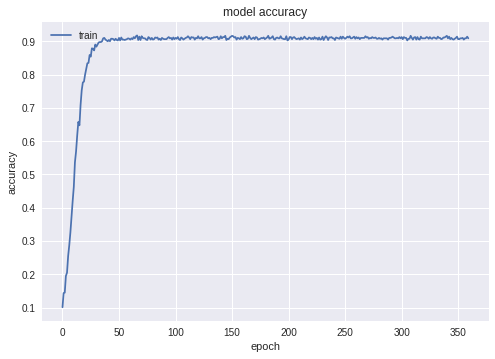

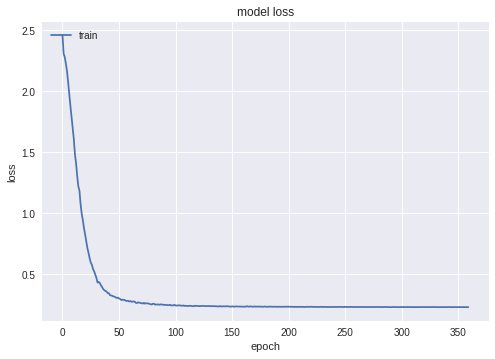

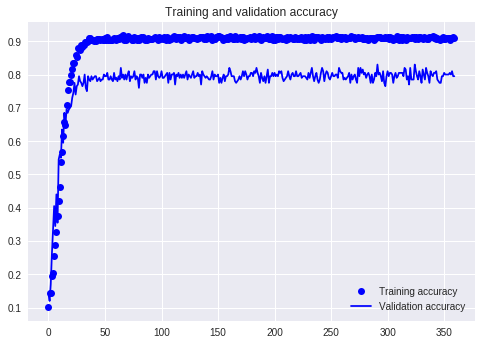

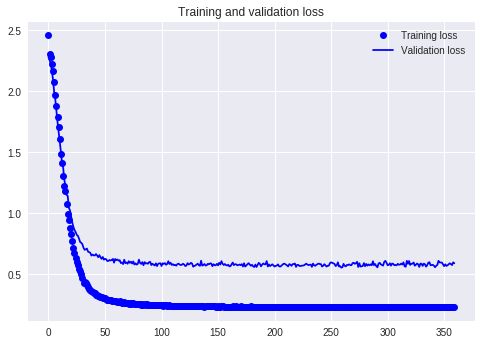

200/200 [==============================] - 0s 885us/step
Test loss: 0.5647177839279175
Test accuracy: 0.805
(200, 10)
[[15  0  0  2  0  0  1  0  0  2]
 [ 0 12  0  0  0  6  0  0  0  2]
 [ 3  0 16  0  0  0  0  0  0  1]
 [ 2  0  0 17  0  0  0  0  0  1]
 [ 0  0  0  0 14  0  0  0  4  2]
 [ 1  1  0  0  0 17  0  0  0  1]
 [ 0  0  2  0  0  0 16  0  0  2]
 [ 0  0  0  0  0  0  0 18  0  2]
 [ 1  0  0  0  2  0  0  0 16  1]
 [ 0  0  0  0  0  0  0  0  0 20]]
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        20
           1       0.92      0.60      0.73        20
           2       0.89      0.80      0.84        20
           3       0.89      0.85      0.87        20
           4       0.88      0.70      0.78        20
           5       0.74      0.85      0.79        20
           6       0.94      0.80      0.86        20
           7       1.00      0.90      0.95        20
           8       0.80      0.80      0.80        20
          

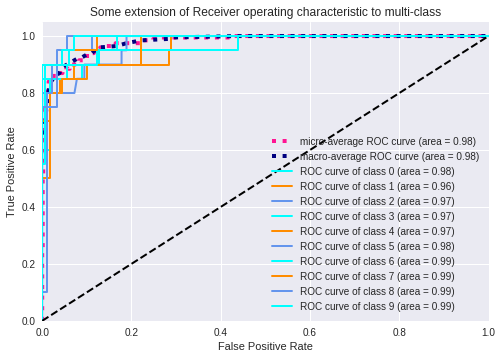

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(80, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='sigmoid', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(5)))


model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.adam(lr=0.001),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = enc.inverse_transform(pred_y)
ytest = enc.inverse_transform(test_y)
cm = confusion_matrix(ytest, predy)
print(cm)
print(classification_report(ytest, predy))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("The accuracy per activity is : ",cm.diagonal())

print(ytest.shape)
print(predy.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2

y_score = pred_y
y_test = test_y
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nClasses):
    #x = np.where(y_test == i)[0]
    
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nClasses)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(nClasses):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= nClasses

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(nClasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()